In [383]:
#se instala en la terminal de anaconda el paquete de spotipy para recolectar los datos de spotify
#se utiliza el comando:  conda install -c conda-forge spotipy

#instalamos el paquete de torch
# se instala el comando : conda install -c pytorch pytorch




In [2]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util #import libs

import pandas as pd
import torch
import numpy as np

In [3]:
df_all=pd.read_csv("kmeans_hanna.csv") #load Spotify's dataset


In [4]:
df_all.head()

,#,Song,Artist,Popularity,Genres,Parent Genres,Album,Album Date,Time,Dance,...,Happy,Speech,Live,Loud,Tempo,Key,Camelot,Time Signature,Added At,Spotify Track Id
0,1,Light Switch,Charlie Puth,91,"dance pop, pop, viral pop",Pop,Light Switch,2022-01-20,3:05,69,...,91,31,9,-6,184,F#/G♭ Major,2B,4,2022-02-11,1BSMpVGWs3v5BZKnAQziAc
1,2,Lookalike,Conan Gray,73,"bedroom pop, indie pop, pop","Pop, Rock",Sunset Season,2018-11-16,3:40,43,...,17,4,15,-10,122,A#/B♭ Major,6B,4,2022-02-11,4K3gM7kzX4POAfrs71HomN
2,3,The Very First Night (Taylor's Version) (From ...,Taylor Swift,78,pop,Pop,Red (Taylor's Version),2021-11-12,3:20,68,...,58,3,10,-5,121,G Major,9B,4,2022-02-11,6pYNq0ZwpPVazKzsqpf0G8
3,4,I Still Haven't Found What I'm Looking For,U2,0,"irish rock, permanent wave, rock","World/Traditional, Rock",The Joshua Tree,1987-03-10,4:37,56,...,68,4,7,-13,101,C♯/D♭ Major,3B,4,2022-02-11,5MEMiHV54Y5ODV1zvEPsyp
4,5,People Watching,Conan Gray,81,"bedroom pop, indie pop, pop","Pop, Rock",People Watching,2021-07-15,2:38,53,...,54,5,31,-7,126,F Major,7B,4,2022-02-11,4JeOesjcWWlprTAvucDSJX


In [5]:
df_all.shape

(282, 23)

In [6]:
df_all.describe()

,#,Popularity,Dance,Energy,Acoustic,Instrumental,Happy,Speech,Live,Loud,Tempo,Time Signature
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000
mean,141.500000,66.329787,58.308511,58.014184,29.102837,0.893617,45.411348,5.911348,15.010638,-7.141844,120.865248,3.932624
std,81.550598,19.992021,12.407689,20.748103,29.753795,6.029822,21.837664,5.932834,9.195575,2.956582,29.786600,0.335979
min,1.000000,0.000000,27.000000,11.000000,0.000000,0.000000,4.000000,2.000000,3.000000,-22.000000,63.000000,3.000000
25%,71.250000,62.000000,50.250000,43.250000,2.000000,0.000000,27.000000,3.000000,9.000000,-8.750000,96.000000,4.000000
50%,141.500000,72.000000,58.000000,58.000000,19.000000,0.000000,44.000000,4.000000,12.000000,-6.000000,120.000000,4.000000
75%,211.750000,78.000000,67.000000,75.000000,54.000000,0.000000,61.000000,6.000000,17.000000,-5.000000,140.750000,4.000000
max,282.000000,95.000000,92.000000,98.000000,95.000000,58.000000,96.000000,46.000000,70.000000,-2.000000,206.000000,5.000000


In [7]:
X=df_all[["Acoustic", "Dance", "Live","Energy", "Instrumental", "Happy", "Speech", "Loud"]] #select features 


In [8]:
X.head()

,Acoustic,Dance,Live,Energy,Instrumental,Happy,Speech,Loud
0,11,69,9,63,0,91,31,-6
1,77,43,15,30,0,17,4,-10
2,0,68,10,73,0,58,3,-5
3,2,56,7,63,0,68,4,-13
4,39,53,31,59,0,54,5,-7


In [9]:
from sklearn import preprocessing 
scaler=preprocessing.MinMaxScaler() #intantiate a scaler
#all the feature values are in the range [0,1] ,except of loudnes
#so let's scale it to fit the exact same range

In [10]:
loudness=X["Loud"].values
loudness_scaled=scaler.fit_transform(loudness.reshape(-1, 1))

In [11]:
X["Loud"]=loudness_scaled

C:\Users\HANNAR~1\AppData\Local\Temp/ipykernel_21584/3498652866.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Loud"]=loudness_scaled


In [12]:
features=X.values

In [13]:
features

array([[11.  , 69.  ,  9.  , ..., 91.  , 31.  ,  0.8 ],
       [77.  , 43.  , 15.  , ..., 17.  ,  4.  ,  0.6 ],
       [ 0.  , 68.  , 10.  , ..., 58.  ,  3.  ,  0.85],
       ...,
       [23.  , 69.  ,  7.  , ..., 87.  ,  5.  ,  0.55],
       [ 8.  , 72.  , 11.  , ..., 39.  ,  3.  ,  0.7 ],
       [77.  , 67.  , 11.  , ..., 55.  ,  3.  ,  0.6 ]])

In [14]:
#Selecting the right KMeans model


In [15]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,31) #let's use elbow method to find out what the optimal k is 
for k in K:
    model = KMeans(n_clusters=k)
    model = model.fit(features)
    Sum_of_squared_distances.append(model.inertia_)
    print(f'Completed:{k}')

C:\Users\Hanna Romero\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Completed:1
Completed:2
Completed:3
Completed:4
Completed:5
Completed:6
Completed:7
Completed:8
Completed:9
Completed:10
Completed:11
Completed:12
Completed:13
Completed:14
Completed:15
Completed:16
Completed:17
Completed:18
Completed:19
Completed:20
Completed:21
Completed:22
Completed:23
Completed:24
Completed:25
Completed:26
Completed:27
Completed:28
Completed:29
Completed:30


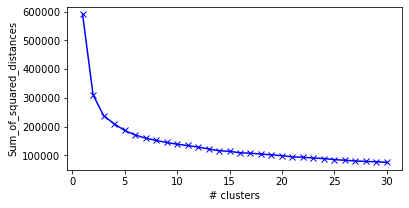

In [16]:
import matplotlib.pyplot as plt #Elbow method
plt.figure(figsize=(6,3))
plt.plot(list(range(1,31)),Sum_of_squared_distances,'bx-')
plt.ylabel('Sum_of_squared_distances')
plt.xlabel('# clusters')
plt.show()
#5 looks to be an appropriate number 

In [17]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5)
model = model.fit(features)

In [18]:
#Clustering

In [19]:
predictions=model.predict(features) #make predictions


In [20]:
predictions


array([0, 1, 0, 0, 2, 3, 1, 0, 3, 2, 0, 0, 3, 0, 1, 2, 2, 0, 3, 0, 3, 3,
       2, 1, 4, 2, 4, 3, 3, 3, 4, 2, 2, 3, 2, 3, 3, 1, 1, 1, 1, 3, 2, 2,
       1, 0, 2, 2, 2, 2, 1, 1, 3, 1, 3, 1, 2, 3, 4, 2, 1, 4, 3, 1, 3, 3,
       3, 3, 1, 0, 2, 3, 0, 2, 4, 4, 2, 3, 3, 2, 0, 4, 4, 4, 0, 2, 3, 3,
       3, 2, 3, 4, 0, 0, 1, 4, 0, 0, 0, 0, 3, 4, 3, 1, 3, 0, 0, 1, 4, 0,
       4, 0, 0, 0, 3, 3, 0, 0, 3, 0, 1, 0, 3, 1, 2, 1, 1, 1, 2, 3, 0, 1,
       0, 3, 3, 1, 0, 2, 3, 0, 4, 0, 1, 2, 3, 3, 1, 4, 1, 3, 1, 2, 2, 1,
       1, 4, 3, 3, 0, 2, 4, 2, 4, 3, 4, 1, 3, 0, 0, 2, 4, 0, 0, 3, 1, 2,
       4, 3, 4, 0, 3, 4, 3, 0, 2, 4, 1, 3, 0, 1, 3, 1, 3, 4, 0, 0, 0, 3,
       0, 1, 3, 2, 2, 0, 4, 4, 2, 1, 4, 1, 0, 4, 1, 4, 3, 4, 1, 4, 3, 2,
       1, 1, 0, 4, 1, 1, 1, 3, 0, 0, 2, 2, 0, 4, 3, 3, 2, 1, 3, 3, 1, 0,
       4, 3, 3, 4, 3, 4, 1, 4, 3, 4, 1, 0, 1, 1, 0, 3, 4, 1, 4, 0, 4, 2,
       0, 3, 1, 3, 1, 4, 0, 3, 1, 3, 1, 4, 2, 1, 1, 4, 4, 1])

In [21]:
df_all['cluster']=predictions


In [22]:
df_all.head()


,#,Song,Artist,Popularity,Genres,Parent Genres,Album,Album Date,Time,Dance,...,Speech,Live,Loud,Tempo,Key,Camelot,Time Signature,Added At,Spotify Track Id,cluster
0,1,Light Switch,Charlie Puth,91,"dance pop, pop, viral pop",Pop,Light Switch,2022-01-20,3:05,69,...,31,9,-6,184,F#/G♭ Major,2B,4,2022-02-11,1BSMpVGWs3v5BZKnAQziAc,0
1,2,Lookalike,Conan Gray,73,"bedroom pop, indie pop, pop","Pop, Rock",Sunset Season,2018-11-16,3:40,43,...,4,15,-10,122,A#/B♭ Major,6B,4,2022-02-11,4K3gM7kzX4POAfrs71HomN,1
2,3,The Very First Night (Taylor's Version) (From ...,Taylor Swift,78,pop,Pop,Red (Taylor's Version),2021-11-12,3:20,68,...,3,10,-5,121,G Major,9B,4,2022-02-11,6pYNq0ZwpPVazKzsqpf0G8,0
3,4,I Still Haven't Found What I'm Looking For,U2,0,"irish rock, permanent wave, rock","World/Traditional, Rock",The Joshua Tree,1987-03-10,4:37,56,...,4,7,-13,101,C♯/D♭ Major,3B,4,2022-02-11,5MEMiHV54Y5ODV1zvEPsyp,0
4,5,People Watching,Conan Gray,81,"bedroom pop, indie pop, pop","Pop, Rock",People Watching,2021-07-15,2:38,53,...,5,31,-7,126,F Major,7B,4,2022-02-11,4JeOesjcWWlprTAvucDSJX,2


In [23]:
#Visualization of the derived clusters


In [24]:
from sklearn import decomposition
pca=decomposition.PCA(n_components=2)
pca_result = pca.fit_transform(features)


In [25]:
df=pd.DataFrame(pca_result)

In [26]:
df['cluster']=predictions

C:\Users\HANNAR~1\AppData\Local\Temp/ipykernel_21584/1329048935.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


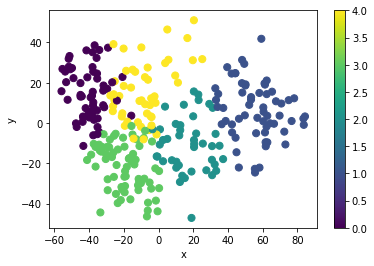

In [27]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)

scatter = ax.scatter(df.iloc[:,0].values, df.iloc[:,1].values,c=predictions,s=50)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.colorbar(scatter)

fig.show()

# Selecting a classifier

Let's determine the best model to use for future classification. It can be used to classify recommended songs by Spoitfy or to classify already saved songs.

In [28]:
df_all.head()


,#,Song,Artist,Popularity,Genres,Parent Genres,Album,Album Date,Time,Dance,...,Speech,Live,Loud,Tempo,Key,Camelot,Time Signature,Added At,Spotify Track Id,cluster
0,1,Light Switch,Charlie Puth,91,"dance pop, pop, viral pop",Pop,Light Switch,2022-01-20,3:05,69,...,31,9,-6,184,F#/G♭ Major,2B,4,2022-02-11,1BSMpVGWs3v5BZKnAQziAc,0
1,2,Lookalike,Conan Gray,73,"bedroom pop, indie pop, pop","Pop, Rock",Sunset Season,2018-11-16,3:40,43,...,4,15,-10,122,A#/B♭ Major,6B,4,2022-02-11,4K3gM7kzX4POAfrs71HomN,1
2,3,The Very First Night (Taylor's Version) (From ...,Taylor Swift,78,pop,Pop,Red (Taylor's Version),2021-11-12,3:20,68,...,3,10,-5,121,G Major,9B,4,2022-02-11,6pYNq0ZwpPVazKzsqpf0G8,0
3,4,I Still Haven't Found What I'm Looking For,U2,0,"irish rock, permanent wave, rock","World/Traditional, Rock",The Joshua Tree,1987-03-10,4:37,56,...,4,7,-13,101,C♯/D♭ Major,3B,4,2022-02-11,5MEMiHV54Y5ODV1zvEPsyp,0
4,5,People Watching,Conan Gray,81,"bedroom pop, indie pop, pop","Pop, Rock",People Watching,2021-07-15,2:38,53,...,5,31,-7,126,F Major,7B,4,2022-02-11,4JeOesjcWWlprTAvucDSJX,2


In [29]:
df_classify=df_all[["Acoustic", "Dance", "Live","Energy", "Instrumental", "Happy", "Speech", "Loud","Speech","cluster"]]#selecting features
X=df_classify.iloc[:,:-1].values
Y=df_classify.iloc[:,-1].values

# Splitting the dataset into the Training set and Test set

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size=0.2)

In [31]:
X_train[:,5]=scaler.fit_transform(X_train[:,5].reshape(-1, 1)).reshape(-1,)
X_test[:,5]=scaler.transform(X_test[:,5].reshape(-1, 1)).reshape(-1,)


## Selecting a classifier

here are four models compared in terms of accuracy, which are KNeighborsClassifier,RandomForestClassifier, Support Vector Classifier and Naive Bayes. Support Vector Classifier tourned out to be the best model in terms of accuracy, which made up roughly 0.998, hence we will be using it for future classification.

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
acc=[]
for i in range(2,10):
  classifier = KNeighborsClassifier(n_neighbors = i, metric = 'minkowski', p = 2)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  acc.append(accuracy_score(y_test, y_pred))
  print(f'{i}:{acc[-1]}')

2:0.6666666666666666
3:0.6842105263157895
4:0.7192982456140351
5:0.7192982456140351
6:0.7017543859649122
7:0.7192982456140351
8:0.7368421052631579
9:0.7192982456140351


In [33]:
from sklearn.ensemble import RandomForestClassifier
acc=[]
for i in range(5,14):
  classifier = RandomForestClassifier(n_estimators = i, criterion = 'entropy', random_state = 0)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  acc.append(accuracy_score(y_test, y_pred))
  print(f'{i}:{acc[-1]}')

5:0.6842105263157895
6:0.6842105263157895
7:0.7192982456140351
8:0.7017543859649122
9:0.7543859649122807
10:0.7017543859649122
11:0.7368421052631579
12:0.7368421052631579
13:0.7719298245614035


In [34]:
from sklearn.naive_bayes import GaussianNB
acc=[]

classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
acc.append(accuracy_score(y_test, y_pred))
print(f'{i}:{acc[-1]}')

13:0.5789473684210527


In [35]:
from sklearn.svm import SVC
acc=[]
for i in ['linear', 'poly', 'rbf', 'sigmoid']:
  classifier = SVC(kernel = i, random_state = 0)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  acc.append(accuracy_score(y_test, y_pred))
  print(f'{i}:{acc[-1]}')

linear:0.7368421052631579
poly:0.7543859649122807
rbf:0.7894736842105263
sigmoid:0.47368421052631576


In [36]:
classifier = SVC(kernel ='poly', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [37]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 6  0  0  7  0]
 [ 0 11  1  0  0]
 [ 0  2  2  0  1]
 [ 1  0  0 11  0]
 [ 0  1  0  1 13]]


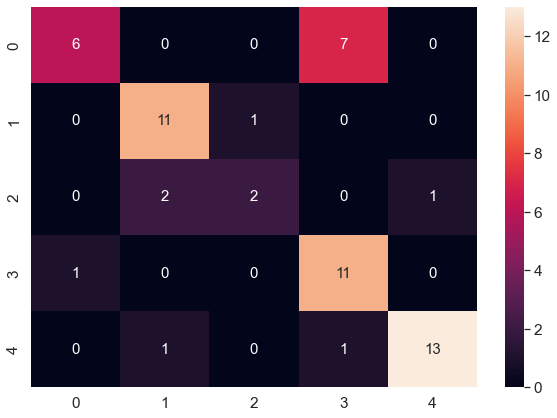

In [38]:
import seaborn as sns
df_cm = pd.DataFrame(cm, range(5), range(5))
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 15}) # font size
plt.show()

## Clusters' description

-Cluster 0 is tourned out to be very high in terms of speechiness since the mean value over all songs is 0.87. If the speechiness of a song is above 0.66, it is probably made of spoken words, a score between 0.33 and 0.66 is a song that may contain both music and words, and a score below 0.33 means the song does not have any speech. Moreover, it is low in instrumentalness but pretty high in danceability. I assume there are mostly songs with low instrumental and danceable. 

-Cluster 1 is relatively high in danceability and energy but low in instrumentalness. I expect to see a lot of energetic songs there. 

-Cluster 2 is very high in acousticness but low in instrumentalness and loudness. Moreover, it has quite high danceability magnitude. Therefore, I expect to see more calm, perhaps sad, songs.

-Cluster 3 is the highest in acousticness and instrumentalness but the lowest in speechiness. 

-Cluster 4 is quite high in instrumentalness and energy and average in danceability.

In [39]:
df_all.head()

,#,Song,Artist,Popularity,Genres,Parent Genres,Album,Album Date,Time,Dance,...,Speech,Live,Loud,Tempo,Key,Camelot,Time Signature,Added At,Spotify Track Id,cluster
0,1,Light Switch,Charlie Puth,91,"dance pop, pop, viral pop",Pop,Light Switch,2022-01-20,3:05,69,...,31,9,-6,184,F#/G♭ Major,2B,4,2022-02-11,1BSMpVGWs3v5BZKnAQziAc,0
1,2,Lookalike,Conan Gray,73,"bedroom pop, indie pop, pop","Pop, Rock",Sunset Season,2018-11-16,3:40,43,...,4,15,-10,122,A#/B♭ Major,6B,4,2022-02-11,4K3gM7kzX4POAfrs71HomN,1
2,3,The Very First Night (Taylor's Version) (From ...,Taylor Swift,78,pop,Pop,Red (Taylor's Version),2021-11-12,3:20,68,...,3,10,-5,121,G Major,9B,4,2022-02-11,6pYNq0ZwpPVazKzsqpf0G8,0
3,4,I Still Haven't Found What I'm Looking For,U2,0,"irish rock, permanent wave, rock","World/Traditional, Rock",The Joshua Tree,1987-03-10,4:37,56,...,4,7,-13,101,C♯/D♭ Major,3B,4,2022-02-11,5MEMiHV54Y5ODV1zvEPsyp,0
4,5,People Watching,Conan Gray,81,"bedroom pop, indie pop, pop","Pop, Rock",People Watching,2021-07-15,2:38,53,...,5,31,-7,126,F Major,7B,4,2022-02-11,4JeOesjcWWlprTAvucDSJX,2


In [40]:
df=df_all[["Acoustic", "Dance", "Live","Energy", "Instrumental", "Happy", "Speech", "Loud","Speech","cluster"]]


In [41]:
cluster_info=[]
for i in range(5):
    cluster_info.append(df[df['cluster']==i].describe().iloc[1,:])
    

In [42]:
cluster_info

[Acoustic         5.847458
 Dance           62.745763
 Live            17.000000
 Energy          80.406780
 Instrumental     0.661017
 Happy           73.000000
 Speech           7.440678
 Loud            -5.186441
 Speech           7.440678
 cluster          0.000000
 Name: mean, dtype: float64,
 Acoustic        76.442623
 Dance           56.180328
 Live            12.852459
 Energy          31.426230
 Instrumental     1.032787
 Happy           30.229508
 Speech           4.557377
 Loud           -10.163934
 Speech           4.557377
 cluster          1.000000
 Name: mean, dtype: float64,
 Acoustic        39.046512
 Dance           51.511628
 Live            14.534884
 Energy          50.813953
 Instrumental     0.023256
 Happy           30.697674
 Speech           6.023256
 Loud            -7.651163
 Speech           6.023256
 cluster          2.000000
 Name: mean, dtype: float64,
 Acoustic         5.690141
 Dance           51.605634
 Live            17.633803
 Energy          69.56


# Description of my saved songs


In [188]:
mydf=df_all[["Acoustic", "Dance", "Live","Energy", "Instrumental", "Happy", "Speech", "Loud"]] #select features 
mydf.head()

,Acoustic,Dance,Live,Energy,Instrumental,Happy,Speech,Loud
0,11,69,9,63,0,91,31,-6
1,77,43,15,30,0,17,4,-10
2,0,68,10,73,0,58,3,-5
3,2,56,7,63,0,68,4,-13
4,39,53,31,59,0,54,5,-7


In [197]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

(<a list of 14 Line2D ticklines objects>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

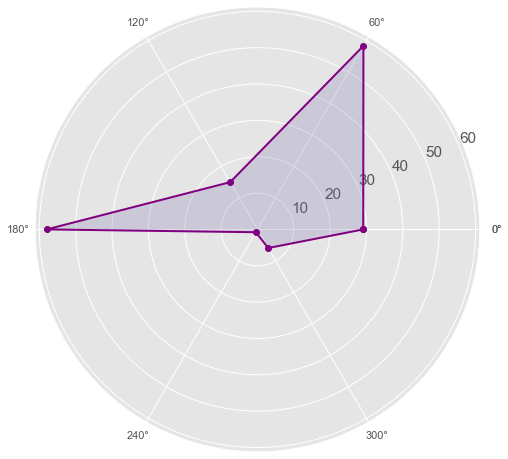

In [353]:
import seaborn as sns
import matplotlib.pyplot as plt
labels= ["Acoustic", "Dance", "Live","Energy", "Instrumental", "Speech"]
stats= mydf[ ["Acoustic", "Dance", "Live","Energy", "Instrumental", "Speech"]].mean().tolist()

angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)

# close the plot
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))

#Size of the figure
fig=plt.figure(figsize = (18,18))

ax = fig.add_subplot(221, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2, label = "Chingis", color= 'purple')
ax.fill(angles, stats, alpha=0.25, facecolor='m')
ax.set_thetagrids(angles*(180/np.pi), fontsize = 11)


# ax.set_rlabel_position(250)
# plt.ylim(0,1)

# ax.set_title('Mean Values of the audio features')
# ax.grid(True)

# plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))


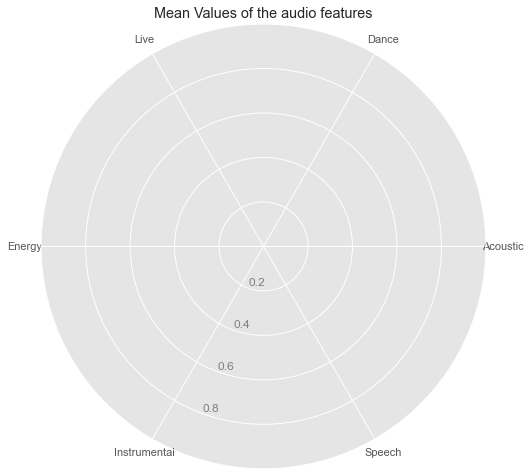

In [355]:
import seaborn as sns
import matplotlib.pyplot as plt
labels= ["Acoustic", "Dance", "Live","Energy", "Instrumental", "Speech"]
stats= mydf[ ["Acoustic", "Dance", "Live","Energy", "Instrumental", "Speech"]].mean().tolist()

angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)

# close the plot
# stats=np.concatenate((stats,[stats[0]]))
# angles=np.concatenate((angles,[angles[0]]))

#Size of the figure
fig=plt.figure(figsize = (18,18))

ax = fig.add_subplot(221, polar=True)
# ax.plot(angles, stats, 'o-', linewidth=2, label = "Chingis", color= 'purple')
#ax.fill(angles, stats, alpha=0.25, facecolor='m')
ax.set_thetagrids(angles * 180/np.pi, labels , fontsize = 11)


ax.set_rlabel_position(250)
plt.yticks([0.2 , 0.4 , 0.6 , 0.8  ], ["0.2",'0.4', "0.6", "0.8"], color="grey", size=12)
plt.ylim(0,1)

ax.set_title('Mean Values of the audio features')
ax.grid(True)



In [305]:
print('my saved songs:')

df_all.head()




my saved songs:


,#,Song,Artist,Popularity,Genres,Parent Genres,Album,Album Date,Time,Dance,...,Speech,Live,Loud,Tempo,Key,Camelot,Time Signature,Added At,Spotify Track Id,cluster
0,1,Light Switch,Charlie Puth,91,"dance pop, pop, viral pop",Pop,Light Switch,2022-01-20,3:05,69,...,31,9,-6,184,F#/G♭ Major,2B,4,2022-02-11,1BSMpVGWs3v5BZKnAQziAc,0
1,2,Lookalike,Conan Gray,73,"bedroom pop, indie pop, pop","Pop, Rock",Sunset Season,2018-11-16,3:40,43,...,4,15,-10,122,A#/B♭ Major,6B,4,2022-02-11,4K3gM7kzX4POAfrs71HomN,1
2,3,The Very First Night (Taylor's Version) (From ...,Taylor Swift,78,pop,Pop,Red (Taylor's Version),2021-11-12,3:20,68,...,3,10,-5,121,G Major,9B,4,2022-02-11,6pYNq0ZwpPVazKzsqpf0G8,0
3,4,I Still Haven't Found What I'm Looking For,U2,0,"irish rock, permanent wave, rock","World/Traditional, Rock",The Joshua Tree,1987-03-10,4:37,56,...,4,7,-13,101,C♯/D♭ Major,3B,4,2022-02-11,5MEMiHV54Y5ODV1zvEPsyp,0
4,5,People Watching,Conan Gray,81,"bedroom pop, indie pop, pop","Pop, Rock",People Watching,2021-07-15,2:38,53,...,5,31,-7,126,F Major,7B,4,2022-02-11,4JeOesjcWWlprTAvucDSJX,2


In [306]:
len_clusters=[]
for i in range(5):
    len_clusters.append(len(df_all[df_all['cluster']==i].values))

In [317]:
print('my saved songs taste/mood:')

moods=['slow instrumental but danceable: ','energetic/dancing: ','calm/romantic: ','studying/thinking','chill:'] #I listened to the songs and generalized them by naming the clusters. 

pers=[]
for i in range(5):
    pers.append(float(len_clusters[i]/sum(len_clusters)))
    print(moods[i],float(len_clusters[i]/sum(len_clusters)))

my saved songs taste/mood:
slow instrumental but danceable:  0.20921985815602837
energetic/dancing:  0.21631205673758866
calm/romantic:  0.1524822695035461
studying/thinking 0.25177304964539005
chill: 0.1702127659574468


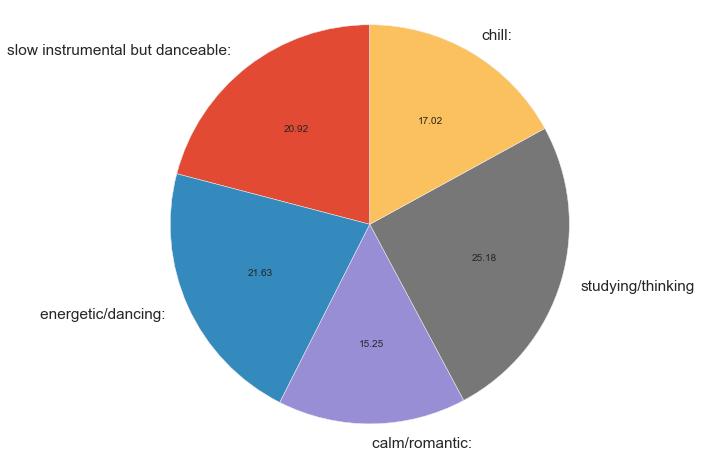

In [319]:

import matplotlib.pyplot as plotter





figureObject, axesObject = plotter.subplots()

 

# Draw the pie chart

axesObject.pie(pers,

        labels=moods,

        autopct='%1.2f',

        startangle=90)

 

# Aspect ratio - equal means pie is a circle

axesObject.axis('equal')

 

plotter.show()